(0.0, 5.1)

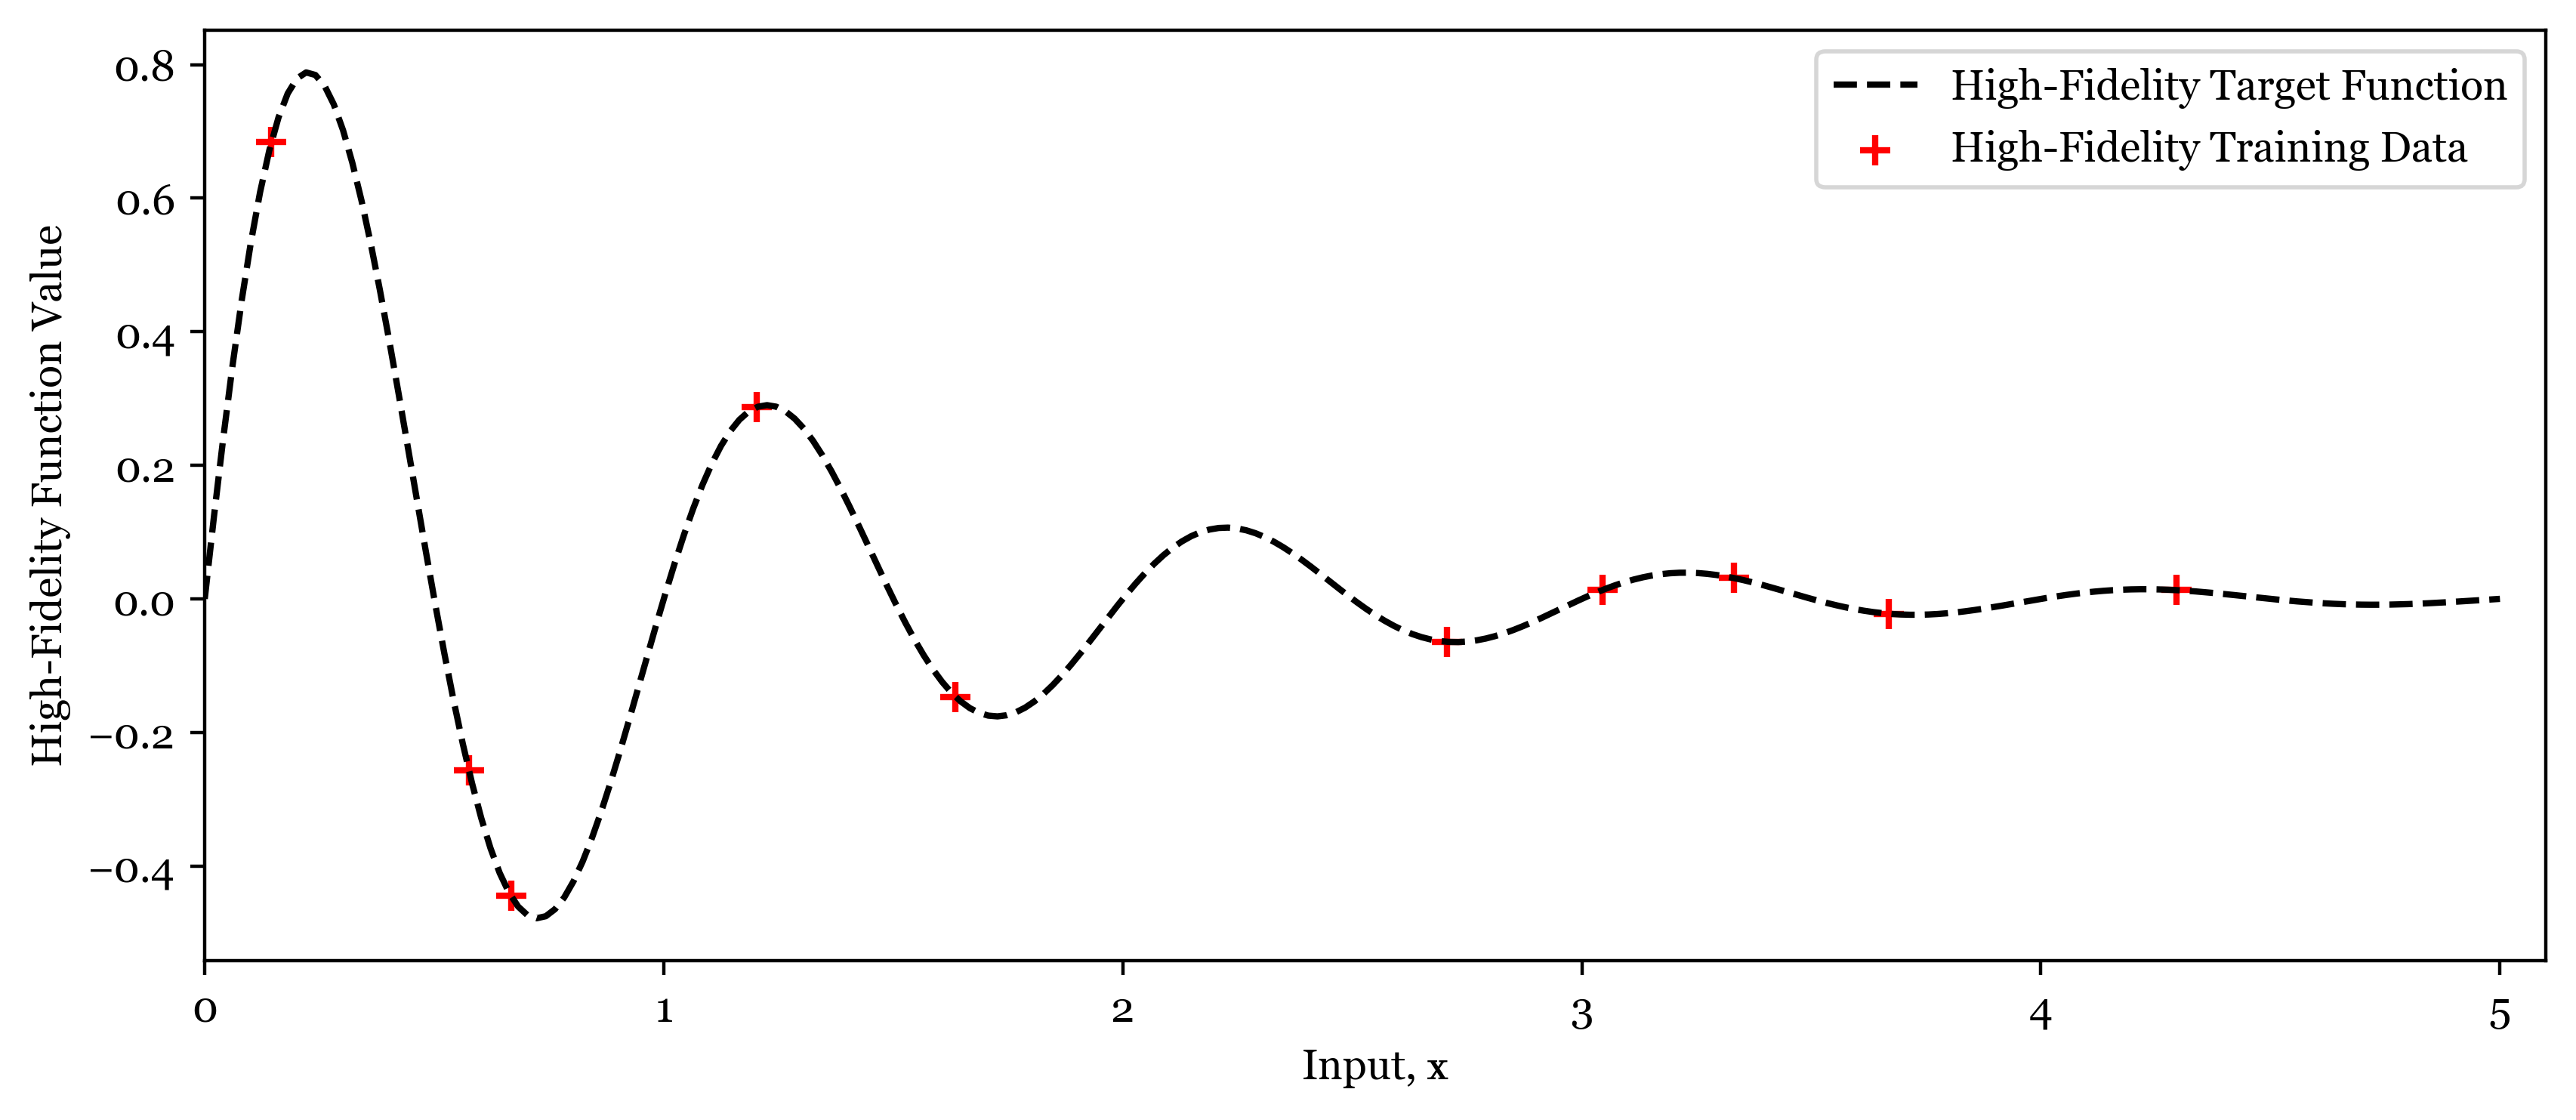

In [21]:
import sys
sys.path.append("..")   # add parent folder (project/) to Python path
from gplib.mf import *   # now absolute import worksimport math 
import matplotlib.pyplot as plt 

# Plot parameters 
plt.rcParams.update({
    "font.family": "georgia",
    'text.latex.preamble': r'\\usepackage{amsmath}',
    'mathtext.fontset': 'cm',
})

# Define number of fidelity-levels 
n_fidelities = 3 

# Define a list of sample sizes
sample_sizes = [10, 100, 250]

# Define the high and low-fidelity functions
funcs = [
    lambda x: np.exp(-x) * np.sin(2*math.pi*x), 
    lambda x: 0.5*np.exp(-x)*np.sin(2*math.pi*x),
    lambda x: np.exp(-x)
]

# Making some testing data 
Xtest = np.linspace(0.0, 5.0, 250).reshape(-1,1)

# Loading high-fidelity data
true_data = np.hstack((Xtest, funcs[0](Xtest)))

# Selecting optimal high-fidelity data
np.random.seed(43)
cutoff = 0.0
X_hf = np.random.uniform(cutoff, 5.0, size = sample_sizes[0]).reshape(-1,1)
hf_data = np.hstack((X_hf, funcs[0](X_hf)))

# Loading medium-fidelity data 
np.random.seed(43)
X_mf = np.random.uniform(0.0, 5.0, size = sample_sizes[1]).reshape(-1,1)
mf_data = np.hstack((X_mf, funcs[1](X_mf)))

# Loading low-fidelity data 
np.random.seed(43)
X_lf = np.random.uniform(0.0, 5.0, size = sample_sizes[2]).reshape(-1,1)
lf_data = np.hstack((X_lf, funcs[2](X_lf)))

# Creating a multi-fidelity-friendly data dictionary 
data_dict = {
    2:{
        'X':hf_data[:,0].reshape(-1,1),
        'Y':hf_data[:,1],
        'noise_var':1e-8,
        'var':np.var(hf_data[:,1]),
        'cost':100.0
    },
    1:{
        'X':mf_data[:,0].reshape(-1,1),
        'Y':mf_data[:,1],
        'noise_var':1e-8,
        'var':np.var(mf_data[:,1]),
        'cost':2.0
    },
    0:{
        'X':lf_data[:,0].reshape(-1,1),
        'Y':lf_data[:,1],
        'noise_var':1e-8,
        'var':np.var(lf_data[:,1]),
        'cost':1.0
    }
}


plt.figure(figsize=(10,4),dpi = 400)
plt.plot(Xtest.ravel(), funcs[0](Xtest).ravel(), linestyle = 'dashed', color = 'black', label = 'High-Fidelity Target Function')
plt.scatter(hf_data[:,0], hf_data[:,1], s = 50, marker = '+', color = 'red', label = 'High-Fidelity Training Data')

plt.xlabel("Input, $\mathbf{x}$")
plt.ylabel("High-Fidelity Function Value")
plt.legend()
plt.xlim([0,5.1])

In [22]:
model = Cokriging(
    data_dict, RBF, Linear, max_cond = 1e5, epsilon = 1e-6
)

optimizer = Momentum(model, cokriging_neg_mll, beta = 0.0)

In [23]:
params = []
for level in range(model.K):
    params.append('B_%d' % level)
    # params.append('k_param_%d' % level)
    # params.append('m_param_%d' % level)
    # params.append('noise_var_%d' % level)

In [24]:
optimizer.grad_fn(model.p)

(Array(-1650.13908282, dtype=float64),
 {'B_0': Array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-1.24054994e-05,  0.00000000e+00,  0.00000000e+00],
         [-2.47203177e-06, -7.77064387e-05,  0.00000000e+00]],      dtype=float64),
  'B_1': Array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-2.25720080e-06,  0.00000000e+00,  0.00000000e+00],
         [ 6.37714502e-06, -9.51193809e-06,  0.00000000e+00]],      dtype=float64),
  'B_2': Array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-2.08101758e-05,  0.00000000e+00,  0.00000000e+00],
         [-4.01582942e-06, -6.08318398e-05,  0.00000000e+00]],      dtype=float64),
  'k_param_0': Array([ 14.50121285, -66.06812911], dtype=float64),
  'k_param_1': Array([ 15.23077732, -75.84604984], dtype=float64),
  'k_param_2': Array([-4.41541299,  8.5959657 ], dtype=float64),
  'm_param_0': Array([-6.73145066, -6.74531851], dtype=float64),
  'm_param_1': Array([25.11777075, 31.50918613], dty

In [25]:
optimizer.run(3e-2, 250, params)

100%|██████████| 250/250 [00:48<00:00,  5.11it/s, Loss: -1.6501e+03]


In [18]:
model.p

{'B_0': Array([[-13.81551006, -13.81551006, -13.81551006],
        [-13.81551867, -13.81551006, -13.81551006],
        [-13.81550288, -13.81552704, -13.81551006]], dtype=float64),
 'k_param_0': Array([1.14576659, 5.6009536 ], dtype=float64),
 'm_param_0': Array([ 0.58433753, -0.15044986], dtype=float64),
 'noise_var_0': Array(-18.42068075, dtype=float64, weak_type=True),
 'B_1': Array([[-13.81551006, -13.81551006, -13.81551006],
        [-13.82016376, -13.81551006, -13.81551006],
        [-13.81918493, -13.81549444, -13.81551006]], dtype=float64),
 'k_param_1': Array([  2.62903741, -22.9045027 ], dtype=float64),
 'm_param_1': Array([ 0.08924216, -0.0240476 ], dtype=float64),
 'noise_var_1': Array(-18.42068075, dtype=float64, weak_type=True),
 'B_2': Array([[-13.81551006, -13.81551006, -13.81551006],
        [-13.89197418, -13.81551006, -13.81551006],
        [-13.821645  , -13.81551202, -13.81551006]], dtype=float64),
 'k_param_2': Array([-2.48575365, -2.47534819], dtype=float64),
 'm_

In [19]:
# model.d[2]['model'].p['noise_var'] = jnp.array(-1e5)
mu, cov = model.predict(Xtest, 2, full_cov = False)
cov = jnp.sqrt(cov)*1.96

(0.0, 5.1)

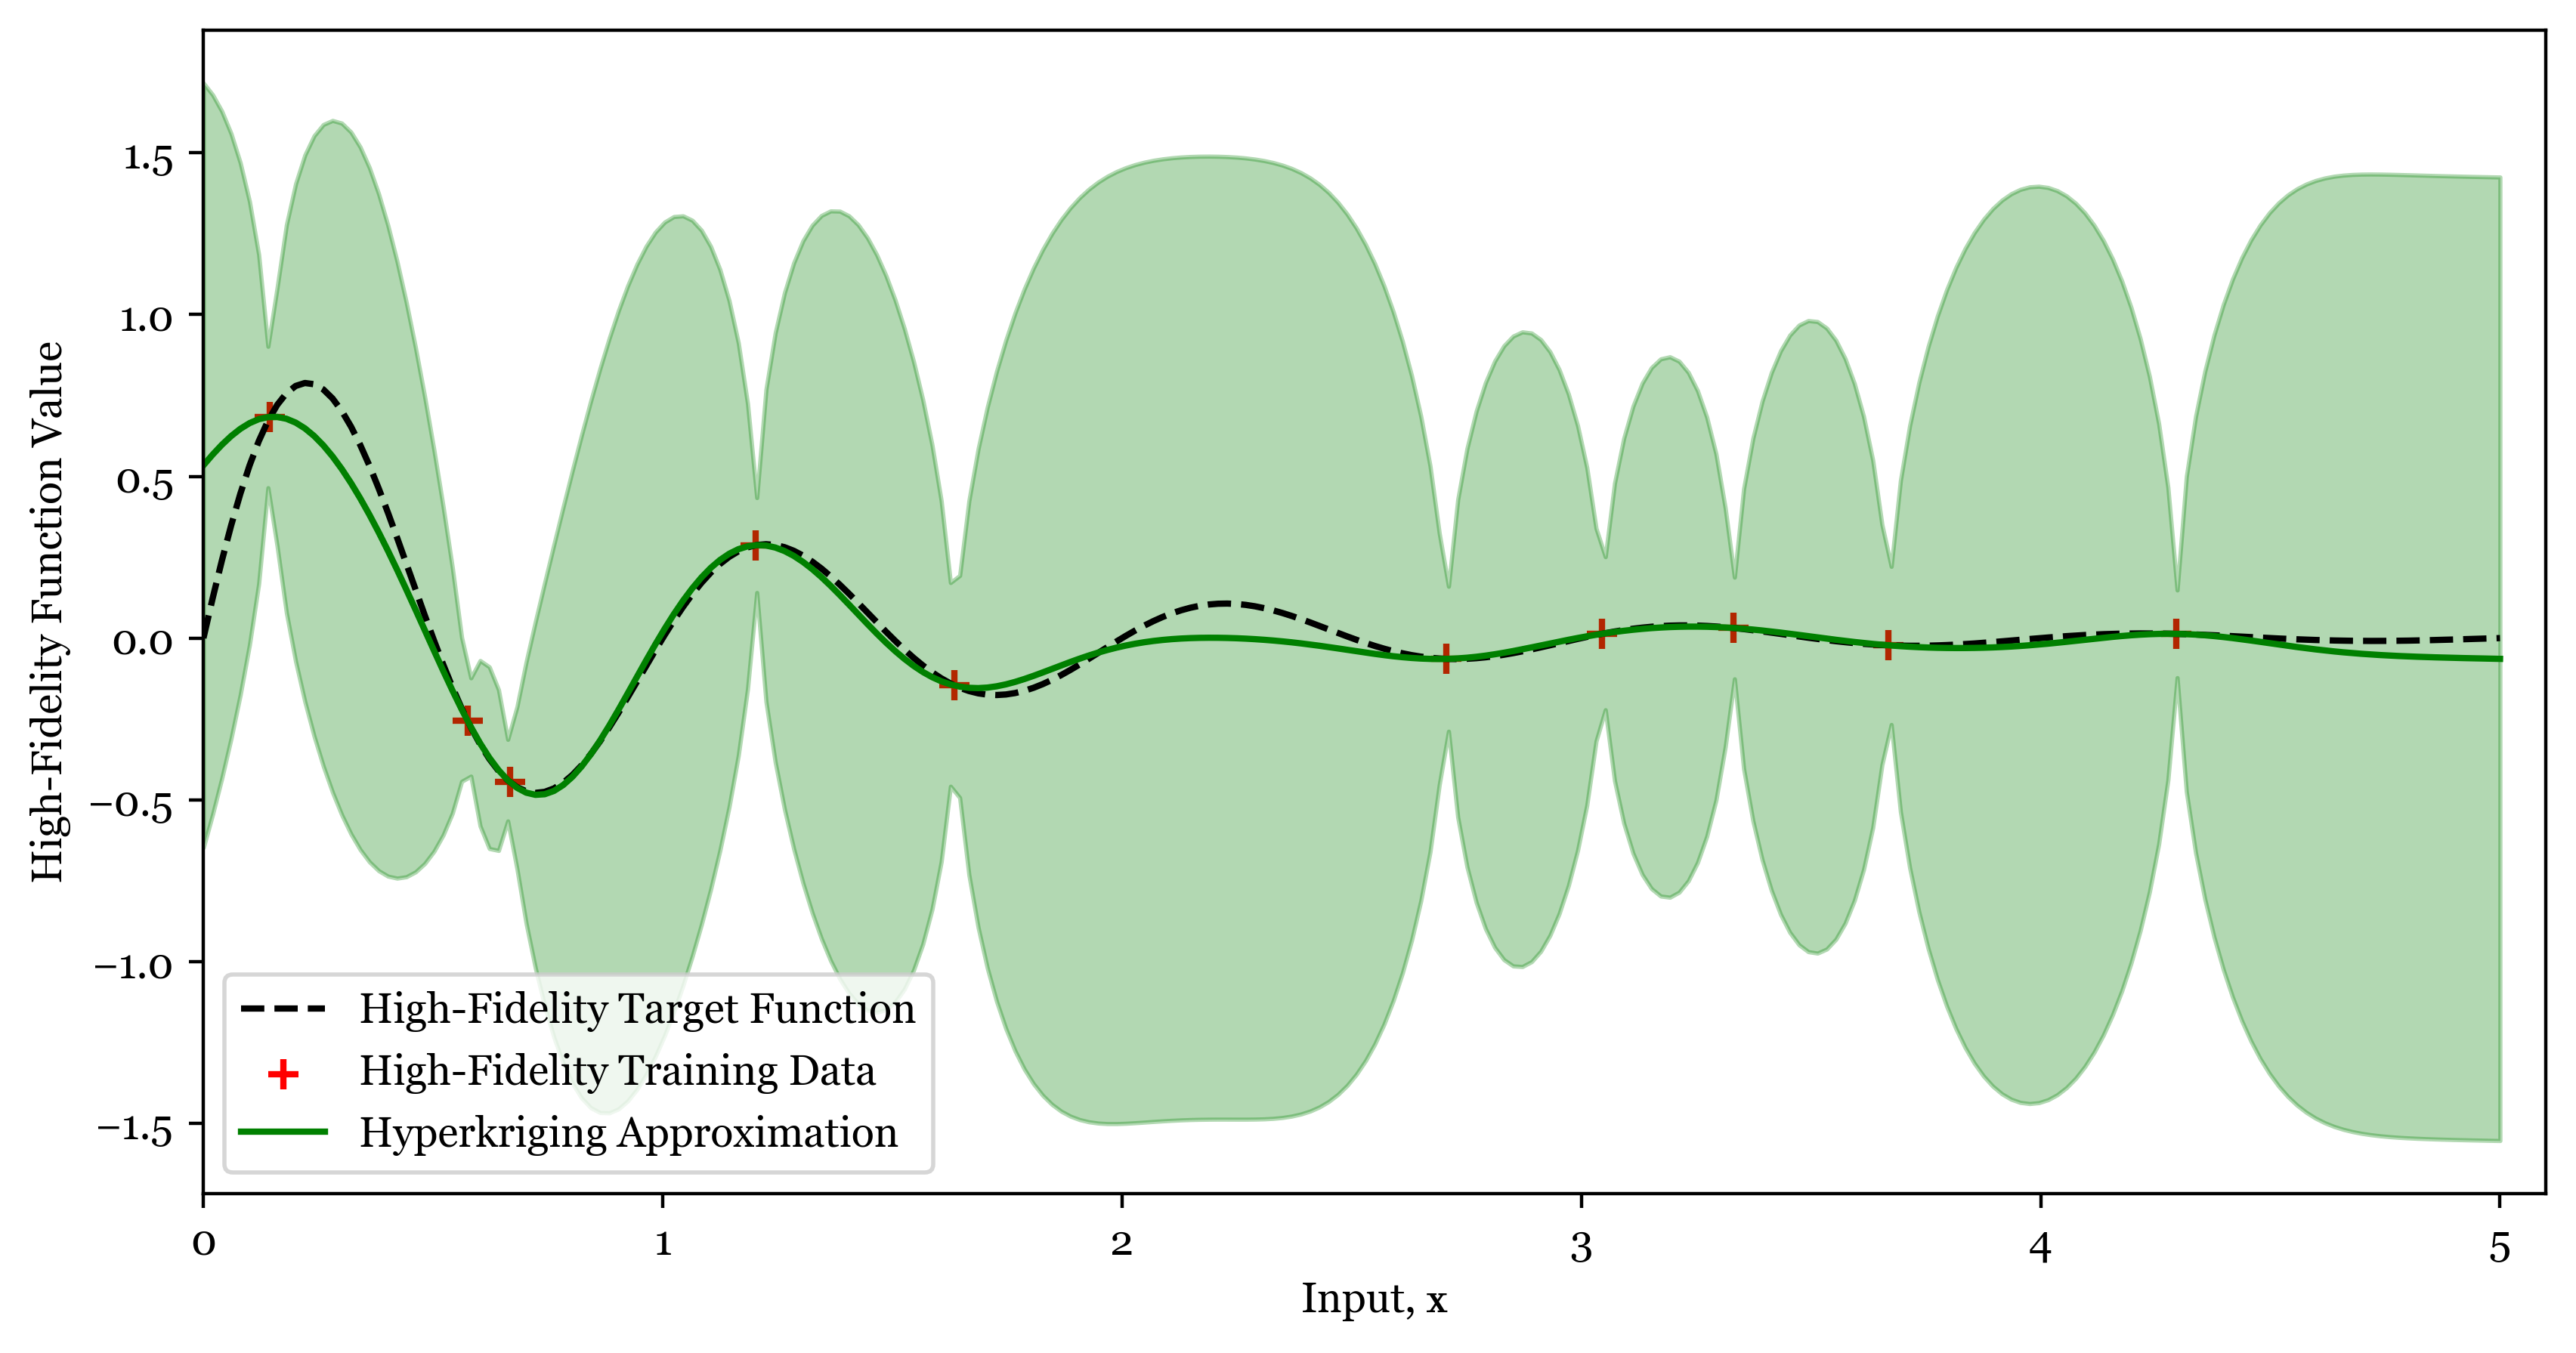

In [20]:
plt.figure(figsize=(10,5),dpi = 400)
plt.plot(Xtest.ravel(), funcs[0](Xtest).ravel(), linestyle = 'dashed', color = 'black', label = 'High-Fidelity Target Function')
plt.scatter(hf_data[:,0], hf_data[:,1], s = 50, marker = '+', color = 'red', label = 'High-Fidelity Training Data')
plt.plot(Xtest.ravel(), mu, color = 'green', label = "Hyperkriging Approximation")
plt.fill_between(Xtest.ravel(), mu -2*np.sqrt(cov), mu + 2*np.sqrt(cov), alpha = 0.3, color = 'green')

plt.xlabel("Input, $\mathbf{x}$")
plt.ylabel("High-Fidelity Function Value")
plt.legend()
plt.xlim([0,5.1])

In [9]:
model.p

{'B_0': Array([[-13.81551006, -13.81551006, -13.81551006],
        [-13.8155126 , -13.81551006, -13.81551006],
        [-13.81550955, -13.81550966, -13.81551006]], dtype=float64),
 'k_param_0': Array([-2.36053692,  1.5051987 ], dtype=float64),
 'm_param_0': Array([ 0.58433753, -0.15044986], dtype=float64),
 'noise_var_0': Array(-18.42068075, dtype=float64, weak_type=True),
 'B_1': Array([[-13.81551006, -13.81551006, -13.81551006],
        [-13.81552977, -13.81551006, -13.81551006],
        [-13.81549693, -13.81550863, -13.81551006]], dtype=float64),
 'k_param_1': Array([-2.44697991, -1.02116813], dtype=float64),
 'm_param_1': Array([ 0.08924216, -0.0240476 ], dtype=float64),
 'noise_var_1': Array(-18.42068075, dtype=float64, weak_type=True),
 'B_2': Array([[-13.81551006, -13.81551006, -13.81551006],
        [-13.81585706, -13.81551006, -13.81551006],
        [-13.81543995, -13.81550228, -13.81551006]], dtype=float64),
 'k_param_2': Array([-2.23382135, -1.9216005 ], dtype=float64),
 'm_